<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Libraries </p>
     </b>
</h1>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Loading Data </p>
     </b>
</h1>

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Understand the Data </p>
     </b>
</h1>

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df =df.drop('id', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
round(df.describe(include='all'),2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data Cleaning </p>
     </b>
</h1>

In [8]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [9]:
filtered_rows = df[(df['gender'] != 'Male') & (df['gender'] != 'Female')]
df= df.drop(filtered_rows.index)

In [10]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.dropna(how='any', inplace =True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


In [13]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [14]:
num_cols = ['age','bmi','avg_glucose_level']
categorical_cols = ['gender','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','smoking_status','stroke']

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data Visualization </p>
     </b>
</h1>

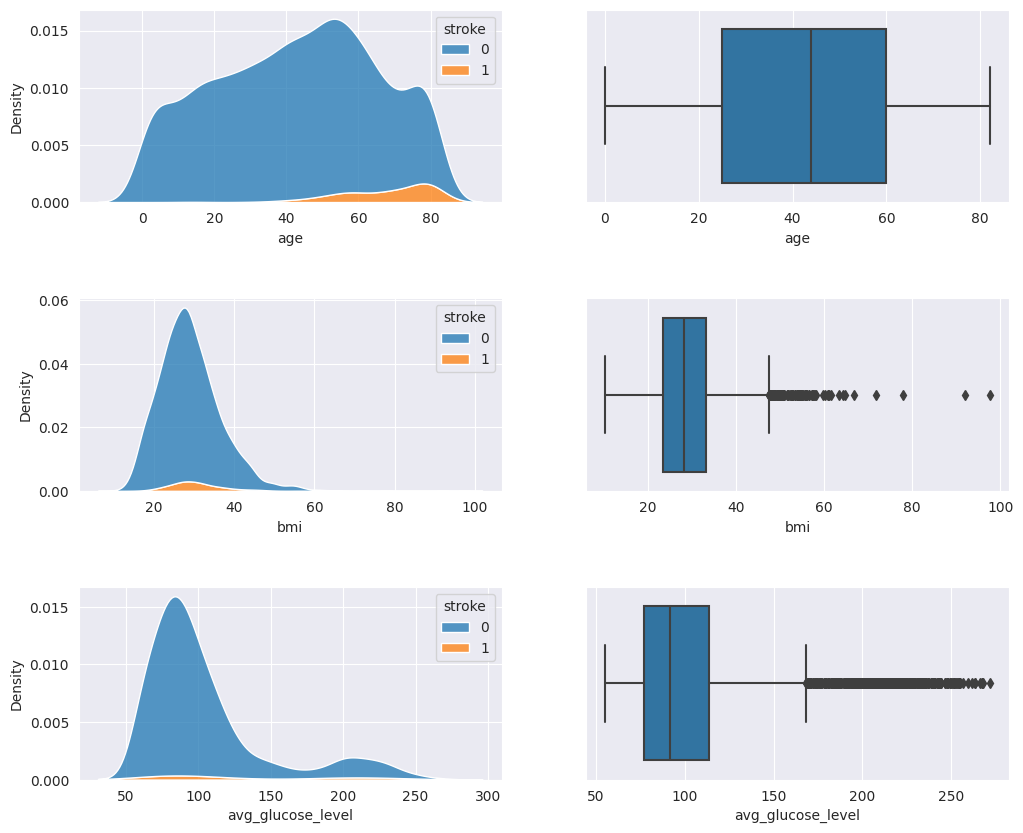

In [15]:
i=0
fig, ax= plt.subplots(3,2, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
for col in num_cols:
    sns.kdeplot(x=col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    sns.boxplot(x=col, data=df, ax=ax[i,1])
    i += 1
plt.show()

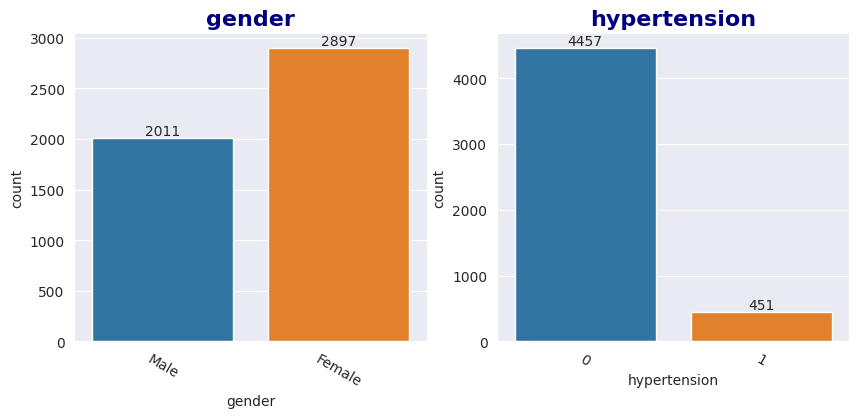

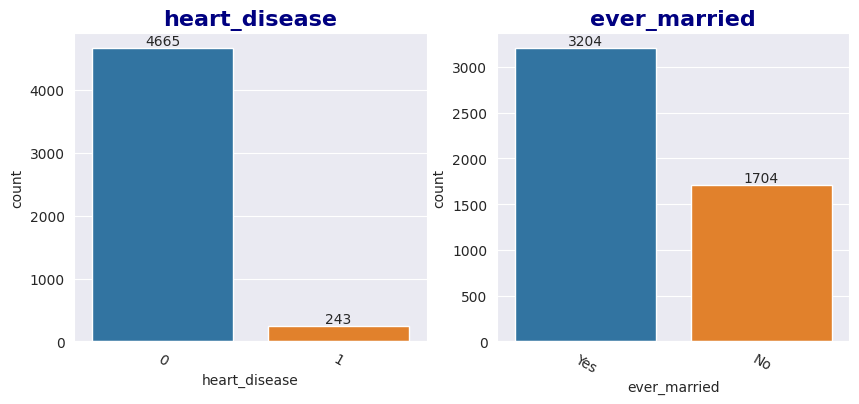

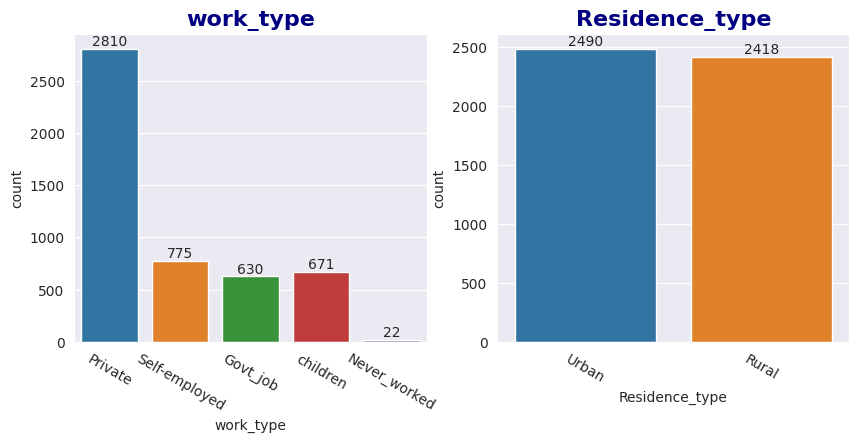

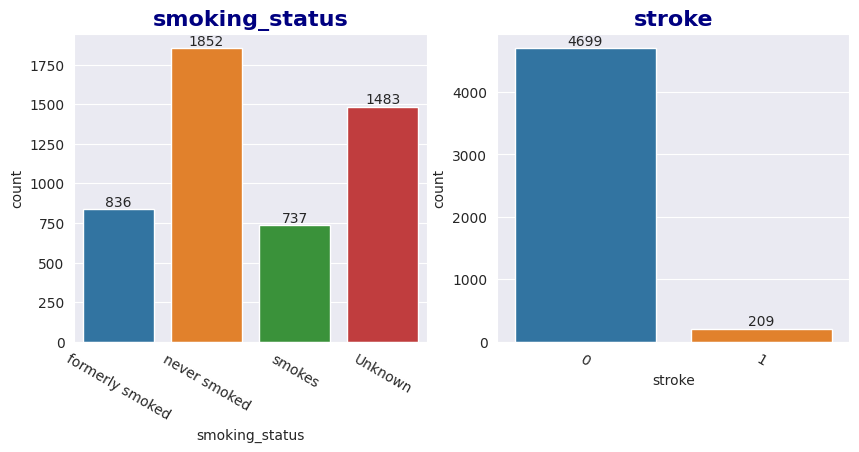

In [16]:
i=0
while i<8 :
    
    # Left Plot
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
   
    i+=1
    
    # Right Plot
    plt.subplot(1, 2, 2)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
    i+=1
    plt.show()

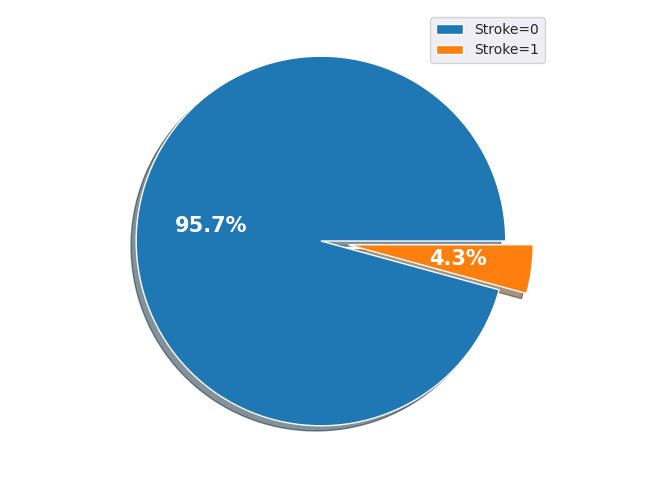

In [17]:
x = df['stroke'].value_counts()

explode = [0,0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax=plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))

plt.pie(x,explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, 
        textprops=dict(color='w', weight='bold', size=15))
plt.legend()
plt.show()

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Data Preparation for Modeling </p>
     </b>
</h1>

In [18]:
for col in categorical_cols :
    print('Column: ',col)
    for index, unique in enumerate(df[col].unique()):
        print(unique,' : ', index)
    print('*'*50)

Column:  gender
Male  :  0
Female  :  1
**************************************************
Column:  hypertension
0  :  0
1  :  1
**************************************************
Column:  heart_disease
1  :  0
0  :  1
**************************************************
Column:  ever_married
Yes  :  0
No  :  1
**************************************************
Column:  work_type
Private  :  0
Self-employed  :  1
Govt_job  :  2
children  :  3
Never_worked  :  4
**************************************************
Column:  Residence_type
Urban  :  0
Rural  :  1
**************************************************
Column:  smoking_status
formerly smoked  :  0
never smoked  :  1
smokes  :  2
Unknown  :  3
**************************************************
Column:  stroke
1  :  0
0  :  1
**************************************************


<h2>
    <b>
        <span style="color:#E67E22">
            Converts Columns into a Binary Representation.
        </span>
    </b>
</h2>

In [19]:
df['gender']=df['gender'].apply(lambda x: 1 if x =='Male' else 0)
df['ever_married']=df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Residence_type']=df['Residence_type'].apply(lambda x: 1 if x =='Urban' else 0)


In [20]:
for col in categorical_cols :
    print('Column: ',col)
    for index, unique in enumerate(df[col].unique()):
        print(unique,' : ', index)
    print('*'*50)

Column:  gender
1  :  0
0  :  1
**************************************************
Column:  hypertension
0  :  0
1  :  1
**************************************************
Column:  heart_disease
1  :  0
0  :  1
**************************************************
Column:  ever_married
1  :  0
0  :  1
**************************************************
Column:  work_type
Private  :  0
Self-employed  :  1
Govt_job  :  2
children  :  3
Never_worked  :  4
**************************************************
Column:  Residence_type
1  :  0
0  :  1
**************************************************
Column:  smoking_status
formerly smoked  :  0
never smoked  :  1
smokes  :  2
Unknown  :  3
**************************************************
Column:  stroke
1  :  0
0  :  1
**************************************************


In [21]:
df['gender'].value_counts()

gender
0    2897
1    2011
Name: count, dtype: int64

In [22]:
df['ever_married'].value_counts()

ever_married
1    3204
0    1704
Name: count, dtype: int64

In [23]:
df['Residence_type'].value_counts()

Residence_type
1    2490
0    2418
Name: count, dtype: int64

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 421.9+ KB


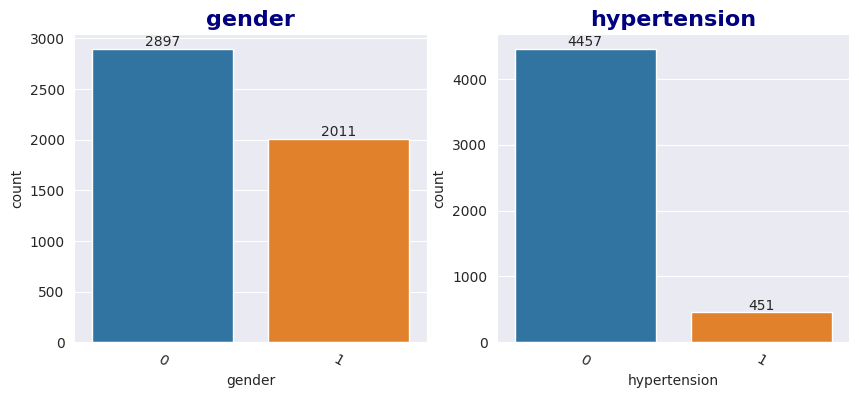

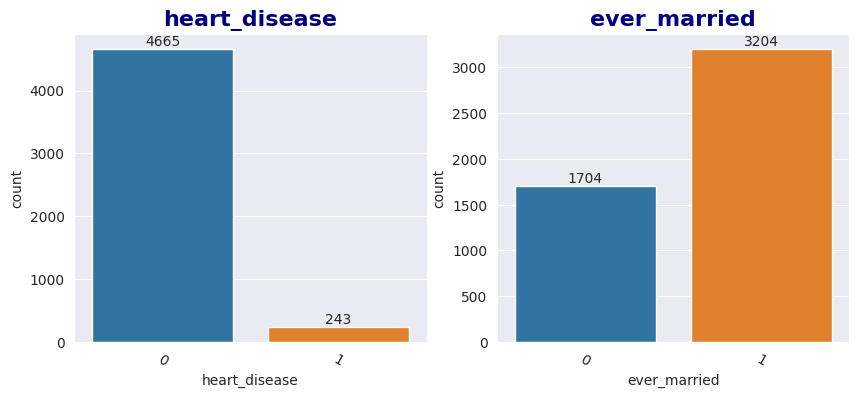

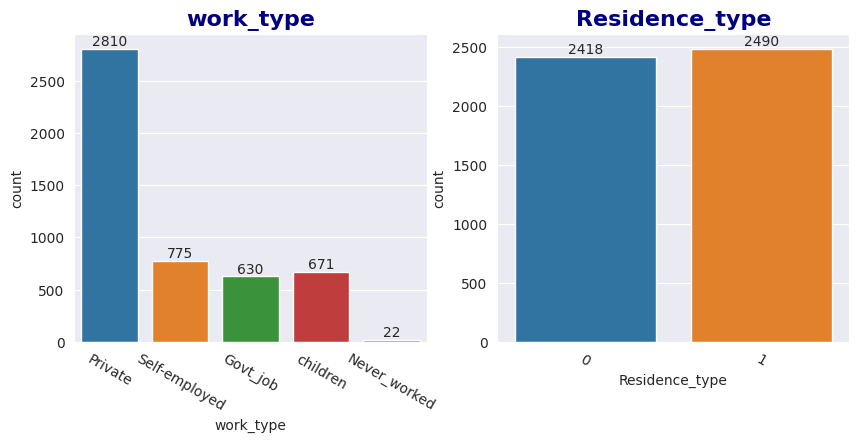

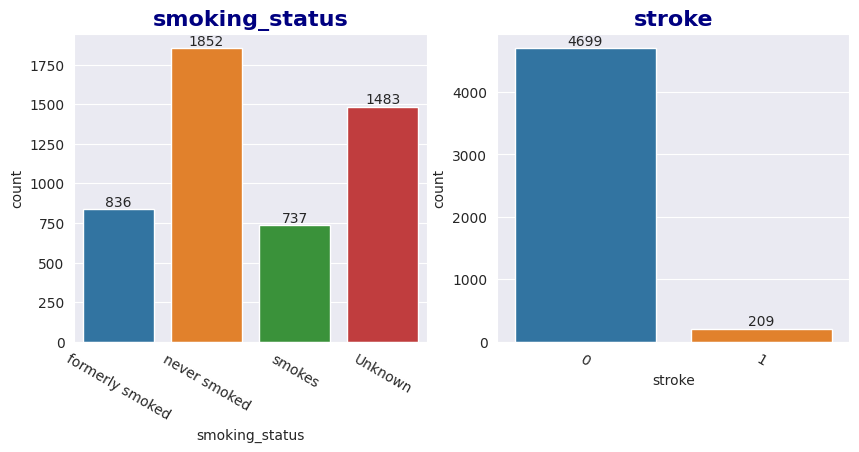

In [25]:
i=0
while i<8 :
    
    # Left Plot
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
   
    i+=1
    
    # Right Plot
    plt.subplot(1, 2, 2)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
    i+=1
    plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            One-Hot Encoding.
        </span>
    </b>
</h2>

In [26]:
df = pd.concat([df.drop('smoking_status', axis=1), pd.get_dummies(df['smoking_status']).add_prefix('smoking_status_')], axis=1 )
df = pd.concat([df.drop('work_type', axis=1), pd.get_dummies(df['work_type']).add_prefix('work_type_')], axis=1)

In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,False,False,True,False,False
1,1,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,True,False,False
2,0,49.0,0,0,1,1,171.23,34.4,1,False,False,False,True,False,False,True,False,False
3,0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,False,False,True,False
4,1,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,0,103.08,18.6,0,True,False,False,False,False,False,False,False,True
4904,0,81.0,0,0,1,1,125.20,40.0,0,False,False,True,False,False,False,False,True,False
4905,0,35.0,0,0,1,0,82.99,30.6,0,False,False,True,False,False,False,False,True,False
4906,1,51.0,0,0,1,0,166.29,25.6,0,False,True,False,False,False,False,True,False,False


<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Basic Correlation </p>
     </b>
</h1>

In [28]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
gender,1.000000,-0.030280,0.021811,0.082950,-0.036380,-0.004351,0.053161,-0.026164,0.006904,0.058065,0.039078,-0.093881,0.011623,-0.015031,0.012316,-0.038831,-0.022210,0.091732
age,-0.030280,1.000000,0.274395,0.257104,0.680742,0.010795,0.236000,0.333314,0.232313,-0.389716,0.242874,0.124273,0.076743,0.133544,-0.079399,0.120169,0.327306,-0.635044
hypertension,0.021811,0.274395,1.000000,0.115978,0.162350,-0.001140,0.180614,0.167770,0.142503,-0.143270,0.062252,0.066671,0.028188,0.019207,-0.021345,-0.004581,0.111770,-0.126590
heart_disease,0.082950,0.257104,0.115978,1.000000,0.111203,-0.002409,0.154577,0.041322,0.137929,-0.074503,0.071477,-0.020722,0.048667,0.005077,-0.015315,-0.000239,0.081466,-0.088092
ever_married,-0.036380,0.680742,0.162350,0.111203,1.000000,0.004707,0.151657,0.341553,0.105051,-0.338433,0.176745,0.105062,0.106479,0.137836,-0.092012,0.157102,0.191389,-0.545687
Residence_type,-0.004351,0.010795,-0.001140,-0.002409,0.004707,1.000000,-0.007441,-0.000293,0.005988,-0.006548,0.006361,-0.021511,0.030910,0.010209,0.023419,-0.016980,0.012087,-0.002873
avg_glucose_level,0.053161,0.236000,0.180614,0.154577,0.151657,-0.007441,1.000000,0.175672,0.138984,-0.103122,0.073907,0.032225,0.011055,0.017791,-0.013980,0.009124,0.069133,-0.101122
bmi,-0.026164,0.333314,0.167770,0.041322,0.341553,-0.000293,0.175672,1.000000,0.042341,-0.270481,0.107463,0.107847,0.088261,0.079526,-0.028615,0.208205,0.072634,-0.448779
stroke,0.006904,0.232313,0.142503,0.137929,0.105051,0.005988,0.138984,0.042341,1.000000,-0.075047,0.057443,0.010690,0.021513,0.003537,-0.014152,0.014972,0.055338,-0.080990
smoking_status_Unknown,0.058065,-0.389716,-0.143270,-0.074503,-0.338433,-0.006548,-0.103122,-0.270481,-0.075047,1.000000,-0.298153,-0.512253,-0.276601,-0.098641,0.008984,-0.214423,-0.107290,0.516946


Text(0.5, 1.0, 'Factor Correlation')

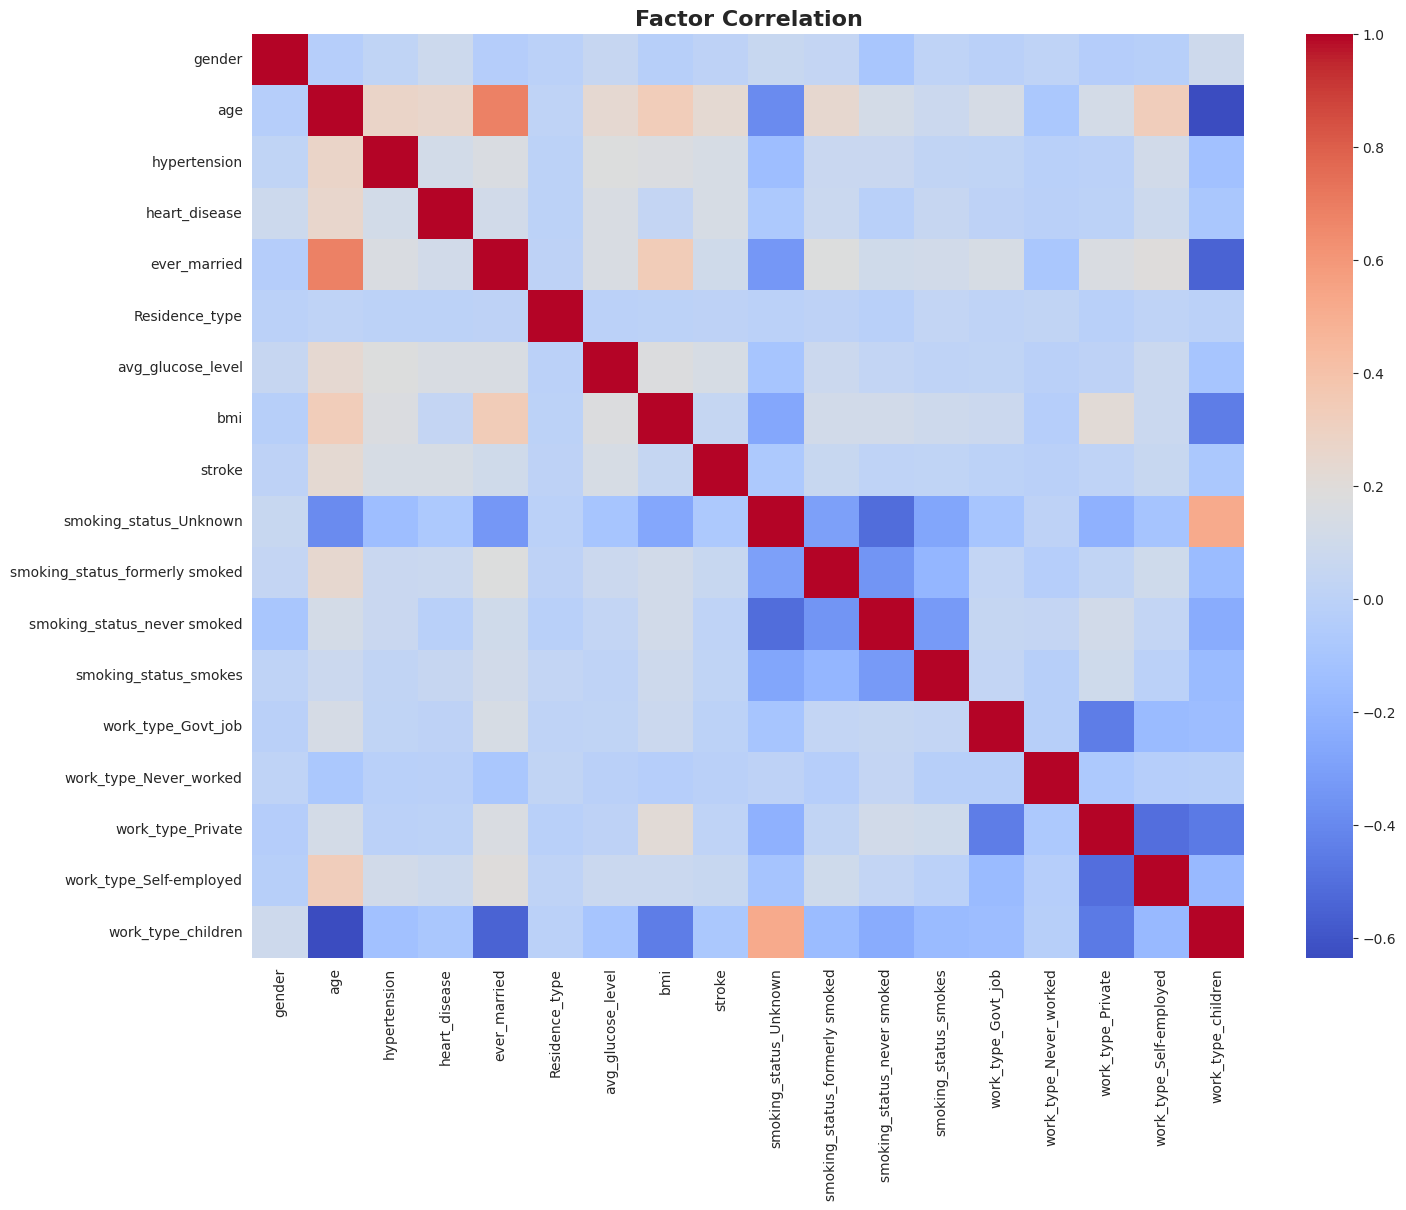

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Factor Correlation", fontweight = "bold", fontsize=16)

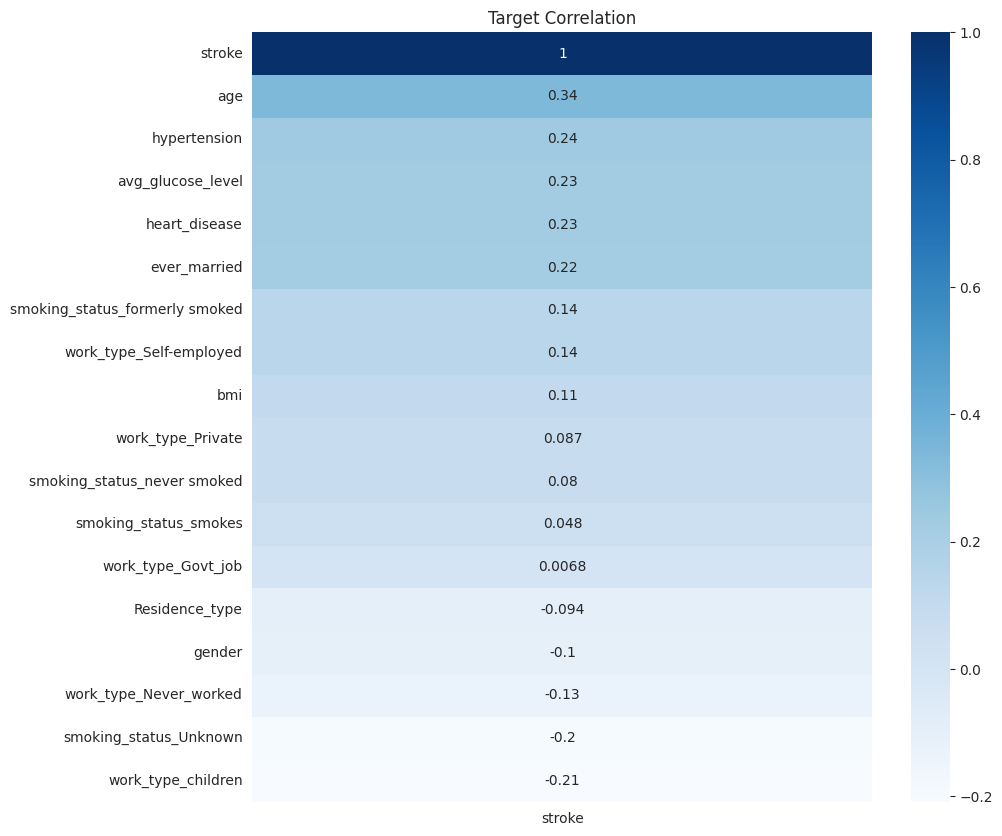

In [30]:
#General overview of how all variables are correlated with each other and with the target variable
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr.corr()[['stroke']].sort_values(by='stroke', ascending=False), annot = True, cmap = 'Blues')
plt.title('Target Correlation')
plt.show()

In [31]:
# Identify the variables most correlated with the target variable
correlations = df.corr()['stroke'].abs()
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations

stroke                            1.000000
age                               0.232313
hypertension                      0.142503
avg_glucose_level                 0.138984
heart_disease                     0.137929
ever_married                      0.105051
work_type_children                0.080990
smoking_status_Unknown            0.075047
smoking_status_formerly smoked    0.057443
work_type_Self-employed           0.055338
bmi                               0.042341
smoking_status_smokes             0.021513
work_type_Private                 0.014972
work_type_Never_worked            0.014152
smoking_status_never smoked       0.010690
gender                            0.006904
Residence_type                    0.005988
work_type_Govt_job                0.003537
Name: stroke, dtype: float64

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Predictor Variables and Target Variable</p>
     </b>
</h1>

In [32]:
X_temp = df.drop('stroke', axis=1)
y = df['stroke']

In [33]:
X_temp


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,False,True,False,False,False,False,True,False,False
1,1,80.0,0,1,1,0,105.92,32.5,False,False,True,False,False,False,True,False,False
2,0,49.0,0,0,1,1,171.23,34.4,False,False,False,True,False,False,True,False,False
3,0,79.0,1,0,1,0,174.12,24.0,False,False,True,False,False,False,False,True,False
4,1,81.0,0,0,1,1,186.21,29.0,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,0,103.08,18.6,True,False,False,False,False,False,False,False,True
4904,0,81.0,0,0,1,1,125.20,40.0,False,False,True,False,False,False,False,True,False
4905,0,35.0,0,0,1,0,82.99,30.6,False,False,True,False,False,False,False,True,False
4906,1,51.0,0,0,1,0,166.29,25.6,False,True,False,False,False,False,True,False,False


In [34]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4903    0
4904    0
4905    0
4906    0
4907    0
Name: stroke, Length: 4908, dtype: int64

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Normalization </p>
     </b>
</h1>

In [35]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler,columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,0.409739,0.522324,0.091891,0.049511,0.652812,0.507335,0.231638,0.212996,0.302160,0.170334,0.377343,0.150163,0.128362,0.004482,0.572535,0.157905,0.136716
std,0.491836,0.275343,0.288901,0.216954,0.476125,0.499997,0.205085,0.089969,0.459241,0.375964,0.484771,0.357268,0.334526,0.066808,0.494761,0.364689,0.343582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.101318,0.151203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.536133,0.000000,0.000000,1.000000,1.000000,0.168775,0.203895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.731445,0.000000,0.000000,1.000000,1.000000,0.269481,0.261168,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4908 non-null   float64
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   float64
 3   heart_disease                   4908 non-null   float64
 4   ever_married                    4908 non-null   float64
 5   Residence_type                  4908 non-null   float64
 6   avg_glucose_level               4908 non-null   float64
 7   bmi                             4908 non-null   float64
 8   smoking_status_Unknown          4908 non-null   float64
 9   smoking_status_formerly smoked  4908 non-null   float64
 10  smoking_status_never smoked     4908 non-null   float64
 11  smoking_status_smokes           4908 non-null   float64
 12  work_type_Govt_job              49

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Train & Test Dataset </p>
     </b>
</h1>

In [37]:
train_X, test_X, train_y,test_y = train_test_split(X,y, test_size = 0.2)

<h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Modeling </p>
     </b>
</h1>

<h2>
    <b>
        <span style="color:#E67E22">
            Confusion Matrix
        </span>
    </b>
</h2>

In [38]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Learning Curve
        </span>
    </b>
</h2>

In [39]:
def plot_learning_curve(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1, num_trainings))
    print(np.linspace(.1,1, num_trainings))
    print(train_sizes)
    print(train_scores)
    print(test_scores)

    train_scores_mean = np.mean(train_scores, axis = 1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.figure(figsize = (15,10))
    plt.grid()
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = .1, color = 'g')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = .1, color = 'r')

    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'g', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'y', label = 'Cross-validation score')
    plt.legend(loc = 'best')
    plt.show()

<h2>
    <b>
        <span style="color:#E67E22">
            Random Forest Classifier
        </span>
    </b>
</h2>

In [40]:
forest = RandomForestClassifier()
forest.fit(train_X,train_y)

RandomForestClassifier()

In [41]:
forest.score(test_X,test_y)

0.9592668024439919

In [42]:
importance = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importance = {k: v for k,v in sorted(importance.items(), key=lambda x:x[1], reverse = True)}
importance

{'avg_glucose_level': 0.27430048360091863,
 'bmi': 0.23314351087268656,
 'age': 0.22463624658522294,
 'Residence_type': 0.035529452762182376,
 'gender': 0.034227545385723195,
 'hypertension': 0.027994471188866537,
 'heart_disease': 0.02469545265853327,
 'smoking_status_never smoked': 0.0218122511695962,
 'work_type_Private': 0.019662812109043772,
 'smoking_status_smokes': 0.0187195024439034,
 'work_type_Self-employed': 0.018620664400589234,
 'smoking_status_formerly smoked': 0.0184170291262306,
 'ever_married': 0.017645647359188117,
 'smoking_status_Unknown': 0.016010085616382137,
 'work_type_Govt_job': 0.013487678203530487,
 'work_type_children': 0.0010944883731611606,
 'work_type_Never_worked': 2.678144241354096e-06}

<h2>
    <b>
        <span style="color:#E67E22">
            Best Parameters for Random Forest Classifier
        </span>
    </b>
</h2>


In [43]:
#Perform hyperparameter tuning on the training set and fit the random forest model with the best found combinations.
param_grid= {
    'n_estimators': [50,100,250],
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4,8],
    'max_features': ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, verbose=10)

In [44]:
%%capture no_output
t1 = datetime.now()
grid_search = grid_search.fit(train_X, train_y)
t2 = datetime.now()

In [45]:
delta = t2-t1
rfc_time = round(delta.total_seconds(), 5)
print(rfc_time)

151.51371


In [46]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=250)

In [47]:
forest= grid_search.best_estimator_

In [48]:
predict_y = forest.predict(test_X)

In [49]:
forest.score(test_X,test_y)
rfc_score=forest.score(test_X,test_y)

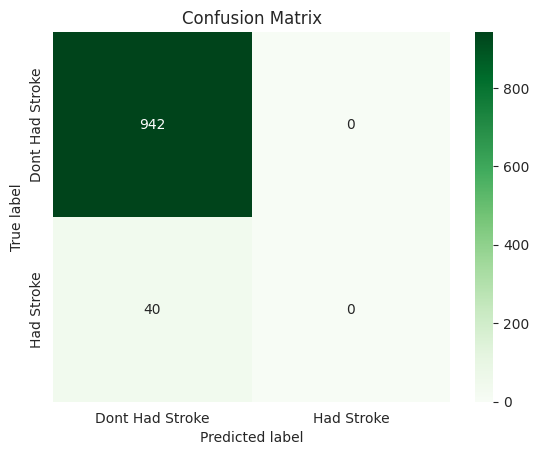

In [50]:
plot_confusion_matrix(test_y, predict_y)

<h3>
    <b>
        <span style="color: green">
            The values of the main diagonal a and d correspond to the values correctly estimated by the model, both true positives_TP(d) and true negatives_TN(a).</br>
The other diagonal, therefore, represents cases where the model "has made a mistake" (c false negatives_FN, b false positives_FP)
        </span>
    </b>
</h3>


In [51]:
cr = metrics.classification_report(test_y, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [52]:
importance = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importance = {k: v for k,v in sorted(importance.items(), key=lambda x:x[1], reverse = True)}
importance

{'avg_glucose_level': 0.26536014270875424,
 'age': 0.23852805362575602,
 'bmi': 0.21166578127387436,
 'heart_disease': 0.03351725971239092,
 'Residence_type': 0.033315391447072976,
 'hypertension': 0.03143562417542173,
 'gender': 0.029350425904255704,
 'work_type_Self-employed': 0.022726945584578138,
 'ever_married': 0.022235590689256485,
 'smoking_status_never smoked': 0.021996837002252644,
 'work_type_Private': 0.021011240278549323,
 'smoking_status_formerly smoked': 0.01911419127207636,
 'smoking_status_smokes': 0.018377874038759404,
 'work_type_Govt_job': 0.015296527441135367,
 'smoking_status_Unknown': 0.014481525058847033,
 'work_type_children': 0.0015823944018281146,
 'work_type_Never_worked': 4.195385191304793e-06}

<h2>
    <b>
        <span style="color:#E67E22">
            Support Vector Classification
        </span>
    </b>
</h2>

In [53]:
#Perform hyperparameter tuning on the training set and fit the model with the best found combinations.
param_grid= {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'kernel':['rbf'],

}
model = SVC()
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10, verbose=10)

In [54]:
%%capture no_output
t1 = datetime.now()
grid_search = grid_search.fit(train_X, train_y)
t2 = datetime.now()

In [55]:
delta = t2-t1
svc_time = round(delta.total_seconds(), 5)
print(svc_time)

139.40884


In [56]:
grid_search.best_estimator_

SVC(C=0.001, gamma=0.001)

In [57]:
clf = grid_search.best_estimator_
predict_y = clf.predict(test_X)

In [58]:
clf.score(test_X, test_y)
svc_score=clf.score(test_X, test_y)

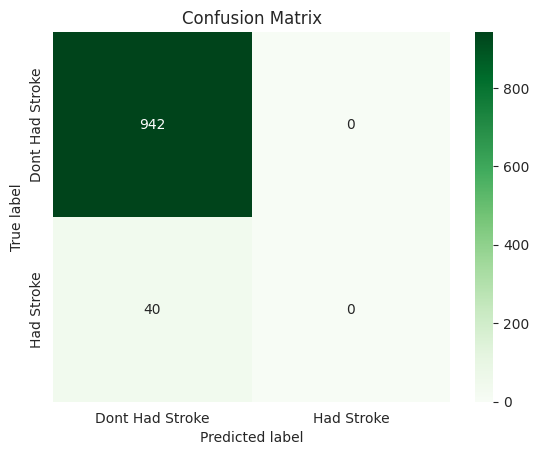

In [59]:
plot_confusion_matrix(test_y, predict_y)

<h3>
    <b>
        <span style="color: green">
            The values of the main diagonal a and d correspond to the values correctly estimated by the model, both true positives_TP(d) and true negatives_TN(a).</br>
The other diagonal, therefore, represents cases where the model "has made a mistake" (c false negatives_FN, b false positives_FP)
        </span>
    </b>
</h3>


In [60]:
cr = metrics.classification_report(test_y, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



<h2>
    <b>
        <span style="color:#E67E22">
            Logistic Regression
        </span>
    </b>
</h2>

In [61]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'multi_class': ['ovr', 'multinomial']
}
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10, verbose=10)

In [62]:
%%capture no_output
t1 = datetime.now()
grid_search = grid_search.fit(train_X, train_y)
t2 = datetime.now()

In [63]:
delta = t2-t1
lr_time = round(delta.total_seconds(), 5)
print(lr_time)

1230.83061


In [64]:
grid_search.best_estimator_

LogisticRegression(multi_class='ovr', penalty='l1', solver='saga')

In [65]:
clf = grid_search.best_estimator_
predict_y = clf.predict(test_X)

In [66]:
clf.score(test_X, test_y)
lr_score=clf.score(test_X, test_y)

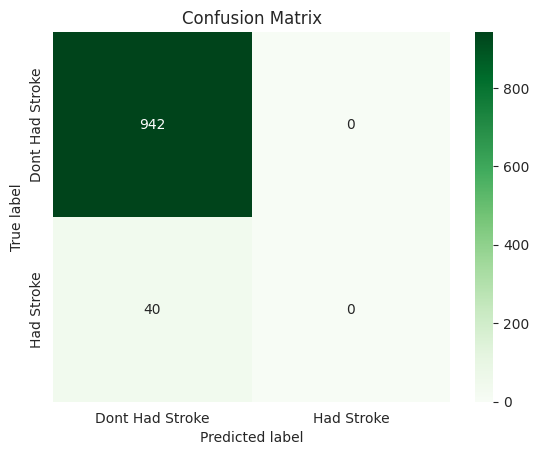

In [67]:
plot_confusion_matrix(test_y, predict_y)

<h3>
    <b>
        <span style="color: green">
            The values of the main diagonal a and d correspond to the values correctly estimated by the model, both true positives_TP(d) and true negatives_TN(a).</br>
The other diagonal, therefore, represents cases where the model "has made a mistake" (c false negatives_FN, b false positives_FP)
        </span>
    </b>
</h3>


# 

In [68]:
cr = metrics.classification_report(test_y, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [69]:
coeficients = clf.coef_[0]
feature_names = train_X.columns 

In [70]:
importance = dict(zip(feature_names,coeficients))
importance = {k: v for k,v in sorted(importance.items(), key=lambda x:x[1], reverse = True)}
importance

{'age': 5.316947705859293,
 'avg_glucose_level': 1.0634930303815358,
 'heart_disease': 0.3906673987497382,
 'hypertension': 0.38811655740342593,
 'smoking_status_smokes': 0.20702074957101724,
 'work_type_Private': 0.06528261361067683,
 'gender': 0.0,
 'ever_married': 0.0,
 'Residence_type': 0.0,
 'bmi': 0.0,
 'smoking_status_formerly smoked': 0.0,
 'smoking_status_never smoked': 0.0,
 'work_type_Govt_job': 0.0,
 'work_type_Never_worked': 0.0,
 'work_type_children': 0.0,
 'smoking_status_Unknown': -0.1179517471224381,
 'work_type_Self-employed': -0.21733988474987218}

<h2>
    <b>
        <span style="color:#E67E22">
            Decision Tree Classifier
        </span>
    </b>
</h2>

In [71]:
#Perform hyperparameter tuning on the training set and fit the model with the best found combinations.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10, verbose=10)

In [72]:
%%capture no_output
t1 = datetime.now()
grid_search = grid_search.fit(train_X, train_y)
t2 = datetime.now()

In [73]:
delta = t2-t1
dtc_time = round(delta.total_seconds(), 5)
print(dtc_time)

35.93995


In [74]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       splitter='random')

In [75]:
clf = grid_search.best_estimator_
predict_y = clf.predict(test_X)

In [76]:
clf.score(test_X, test_y)
dtc_score=clf.score(test_X, test_y)

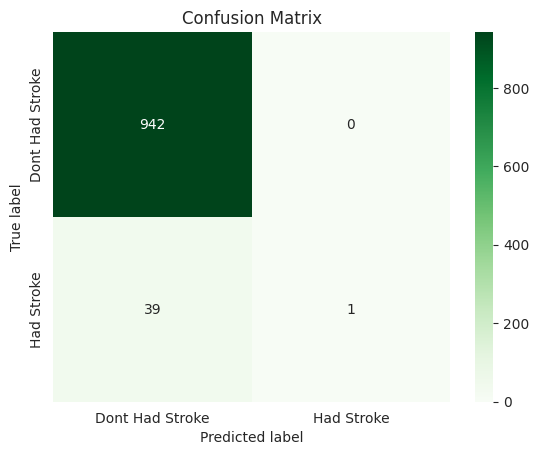

In [77]:
plot_confusion_matrix(test_y, predict_y)

<h3>
    <b>
        <span style="color: green">
            The values of the main diagonal a and d correspond to the values correctly estimated by the model, both true positives_TP(d) and true negatives_TN(a).</br>
The other diagonal, therefore, represents cases where the model "has made a mistake" (c false negatives_FN, b false positives_FP)
        </span>
    </b>
</h3>


In [78]:
cr = metrics.classification_report(test_y, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       1.00      0.03      0.05        40

    accuracy                           0.96       982
   macro avg       0.98      0.51      0.51       982
weighted avg       0.96      0.96      0.94       982



In [79]:
importance = dict(zip(clf.feature_names_in_,clf.feature_importances_))
importance = {k: v for k,v in sorted(importance.items(), key=lambda x:x[1], reverse = True)}
importance

{'age': 0.3818355102276062,
 'avg_glucose_level': 0.11162265286847871,
 'heart_disease': 0.08193276529582932,
 'hypertension': 0.08054578579644572,
 'work_type_Private': 0.0670109247846963,
 'bmi': 0.056540510182312466,
 'gender': 0.04698615571315395,
 'Residence_type': 0.03678117880452339,
 'work_type_Govt_job': 0.03464957438468767,
 'ever_married': 0.027696142719367184,
 'smoking_status_smokes': 0.027268189503063645,
 'smoking_status_never smoked': 0.018316497142170596,
 'work_type_Self-employed': 0.012616149729018427,
 'smoking_status_formerly smoked': 0.009977140519949827,
 'smoking_status_Unknown': 0.00465010071366291,
 'work_type_Never_worked': 0.0015707216150336737,
 'work_type_children': 0.0}

<h2>
    <b>
        <span style="color:#E67E22">
            K-Nearest Neighbors
        </span>
    </b>
</h2>

In [80]:
#Perform hyperparameter tuning on the training set and fit the model with the best found combinations.

param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}
model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10, verbose=10)

In [81]:
%%capture no_output
t1 = datetime.now()
grid_search = grid_search.fit(train_X, train_y)
t2 = datetime.now()

In [82]:
delta = t2-t1
knn_time = round(delta.total_seconds(), 5)
print(knn_time)

44.89767


In [83]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)

In [84]:
clf = grid_search.best_estimator_
predict_y = clf.predict(test_X)

In [85]:
clf.score(test_X, test_y)
knn_score = clf.score(test_X, test_y)

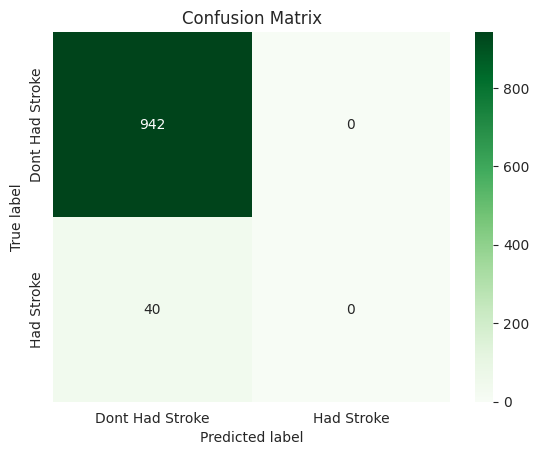

In [86]:
plot_confusion_matrix(test_y, predict_y)

<h3>
    <b>
        <span style="color: green">
            The values of the main diagonal a and d correspond to the values correctly estimated by the model, both true positives_TP(d) and true negatives_TN(a).</br>
The other diagonal, therefore, represents cases where the model "has made a mistake" (c false negatives_FN, b false positives_FP)
        </span>
    </b>
</h3>


[0.1   0.325 0.55  0.775 1.   ]
[ 78 255 431 608 785]
[[1.         0.98717949 0.98717949 0.98717949 0.98717949]
 [0.96862745 0.96862745 0.97254902 0.97254902 0.97254902]
 [0.96055684 0.96055684 0.96055684 0.9675174  0.9675174 ]
 [0.95559211 0.95559211 0.95559211 0.95559211 0.96052632]
 [0.95923567 0.95923567 0.95923567 0.95923567 0.95923567]]
[[0.95939086 0.95939086 0.95918367 0.95918367 0.95918367]
 [0.95939086 0.95939086 0.95918367 0.95918367 0.95918367]
 [0.95939086 0.95939086 0.95918367 0.95918367 0.95918367]
 [0.95939086 0.95939086 0.95918367 0.95918367 0.95918367]
 [0.95939086 0.95939086 0.95918367 0.95918367 0.95918367]]
[0.98974359 0.97098039 0.96334107 0.95657895 0.95923567]


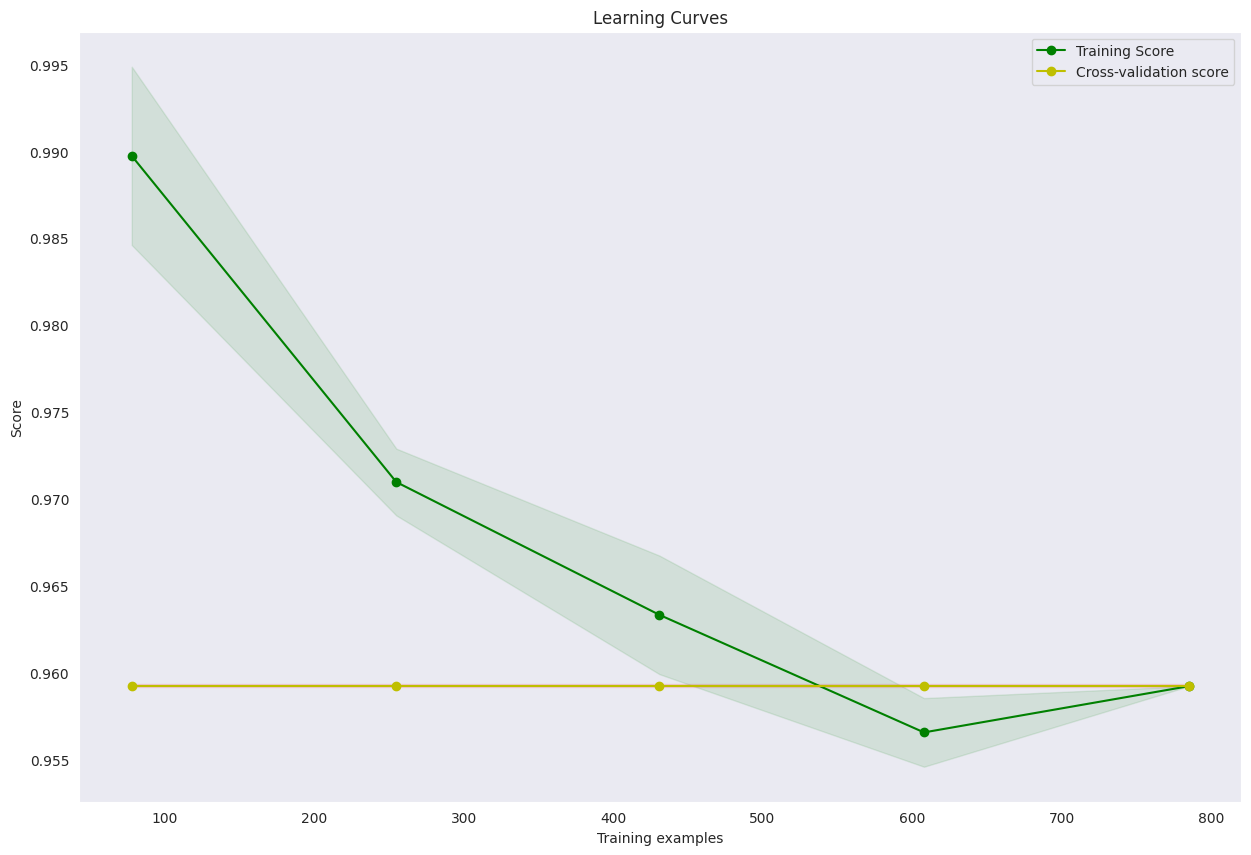

In [87]:
plot_learning_curve(test_X,test_y, clf, 5)

In [88]:
cr = metrics.classification_report(test_y, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



<h2>
    <b>
        <span style="color:#E67E22">
            Results
        </span>
    </b>
</h2>

In [89]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier','SVC', 'LogisticRegression',  'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rfc_score, svc_score, lr_score, dtc_score, knn_score],
    'Delta_Time' : [rfc_time, svc_time, lr_time, dtc_time, knn_time]
})
result_sorted = result.sort_values(by=['Score', 'Delta_Time'], ascending=[False, False])

print(result_sorted.to_string(index=False))

             Algorithm    Score  Delta_Time
DecisionTreeClassifier 0.960285    35.93995
    LogisticRegression 0.959267  1230.83061
RandomForestClassifier 0.959267   151.51371
                   SVC 0.959267   139.40884
  KNeighborsClassifier 0.959267    44.89767


In [90]:
fig = px.line(result, x='Algorithm', y='Score', markers=True, labels={'Score': 'Algorithm Score'})
fig.update_traces(mode='markers+lines', hovertemplate='%{y:.3f}')
fig.update_layout(title='Algorithm by Accuracy', xaxis_title= '', yaxis_title='Accuracy')

fig1 = go.Figure()
fig1.add_trace(go.Bar(x=result['Algorithm'], y=result['Delta_Time'], marker_color=['red', 'green', 'blue', 'orange', 'purple']))
fig1.update_layout(title='Algorithm by Time', xaxis_title='', yaxis_title='Time in Seconds')

fig.show()
fig1.show()

 <h1>
    <b>
<p style="background-image: url(https://i.postimg.cc/L4fL9tTD/background-title.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:50px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Selected Model </p>
     </b>
</h1>

In [91]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)

In [92]:
knn_score

0.9592668024439919